# Chapter 6 - Probability

It is hard to do data science without some sort of understanding of probability and its
mathematics. As with our treatment of statistics in Chapter 5, we’ll wave our hands a
lot and elide many of the technicalities.

For our purposes you should think of probability as a way of quantifying the uncertainty associated with events chosen from a some universe of events. Rather than getting technical about what these terms mean, think of rolling a die. The universe
consists of all possible outcomes. And any subset of these outcomes is an event; for
example, “the die rolls a one” or “the die rolls an even number.”

Notationally, we write P Eto mean “the probability of the event E.”
We’ll use probability theory to build models. We’ll use probability theory to evaluate
models. We’ll use probability theory all over the place.

One could, were one so inclined, get really deep into the philosophy of what probabil‐
ity theory means. (This is best done over beers.) We won’t be doing that.

## Dependence and Independence

Roughly speaking, we say that two events E and F are dependent if knowing some‐
thing about whether E happens gives us information about whether F happens (and
vice versa). Otherwise they are independent.

For instance, if we flip a fair coin twice, knowing whether the first flip is Heads gives
us no information about whether the second flip is Heads. These events are inde‐
pendent. On the other hand, knowing whether the first flip is Heads certainly gives us
information about whether both flips are Tails. (If the first flip is Heads, then defi‐
nitely it’s not the case that both flips are Tails.) These two events are dependent.

Mathematically, we say that two events E and F are independent if the probability that
they both happen is the product of the probabilities that each one happens:

\begin{equation}
    \mathbb{P}(E,F) = \mathbb{P}(E) \mathbb{P}(F)
\end{equation}

In the example above, the probability of “first flip Heads” is 1/2, and the probability of
“both flips Tails” is 1/4, but the probability of “first flip Heads and both flips Tails” is
0.

## Conditional Probability

When two events E and F are independent, then by definition we have:

\begin{equation}
    \mathbb{P}(E,F) = \mathbb{P}(E) \mathbb{P}(F)
\end{equation}

If they are not necessarily independent (and if the probability of F is not zero), then
we define the probability of E “conditional on F” as:

\begin{equation}
    \mathbb{P}(E|F) = \frac{\mathbb{P}(E,F)}{\mathbb{P}(F)}
\end{equation}

You should think of this as the probability that E happens, given that we know that F
happens. We often rewrite this as:

\begin{equation}
    \mathbb{P}(E,F) = \mathbb{P}(F) \mathbb{P}(E|F)
\end{equation}

When E and F are independent, you can check that this gives:

\begin{equation}
    \mathbb{P}(E|F) = \mathbb{P}(E)
\end{equation}

which is the mathematical way of expressing that knowing F occurred gives us no
additional information about whether E occurred.

One common tricky example involves a family with two (unknown) children.
If we assume that:

1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child

then the event “no girls” has probability 1/4, the event “one girl, one boy” has proba‐
bility 1/2, and the event “two girls” has probability 1/4.

Now we can ask what is the probability of the event “both children are girls” (B) con‐
ditional on the event “the older child is a girl” (G)? Using the definition of conditional
probability:

\begin{equation}
    \mathbb{P}(B|G) = \frac{\mathbb{P}(B,G)}{\mathbb{P}(G)} = \frac{\mathbb{P}(B)}{\mathbb{P}(G)} = \frac{1}{2}
\end{equation}

since the event B and G (“both children are girls and the older child is a girl”) is just
the event B. (Once you know that both children are girls, it’s necessarily true that the
older child is a girl.)

Most likely this result accords with your intuition.

We could also ask about the probability of the event “both children are girls” condi‐
tional on the event “at least one of the children is a girl” (L). Surprisingly, the answer
is different from before!

As before, the event B and L (“both children are girls and at least one of the children
is a girl”) is just the event B. This means we have:

\begin{equation}
    \mathbb{P}(B|L) = \frac{\mathbb{P}(B,L)}{\mathbb{P}(L)} = \frac{\mathbb{P}(B)}{\mathbb{P}(L)} = \frac{1}{3}
\end{equation}

How can this be the case? Well, if all you know is that at least one of the children is a
girl, then it is twice as likely that the family has one boy and one girl than that it has
both girls.

We can check this by “generating” a lot of families:

In [3]:
import random

In [4]:
def random_kid():
    return random.choice(["boy","girl"])

In [58]:
both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
        
print('P(both|older) = ', both_girls/older_girl)
print('P(both|either) = ', both_girls/either_girl)

P(both|older) =  0.5007089325501317
P(both|either) =  0.3311897106109325


## Bayes’s Theorem

One of the data scientist’s best friends is Bayes’s Theorem, which is a way of “revers‐
ing” conditional probabilities. Let’s say we need to know the probability of some event
E conditional on some other event F occurring. But we only have information about
the probability of F conditional on E occurring. Using the definition of conditional
probability twice tells us that:

\begin{equation}
    \mathbb{P}(E|F) = \frac{\mathbb{P}(E,F)}{\mathbb{P}(F)} = \frac{\mathbb{P}(F|E) \mathbb{P}(E)}{\mathbb{P}(F)}
\end{equation}

The event F can be split into the two mutually exclusive events “F and E” and “F and
not E.” If we write ¬E for “not E” (i.e., “E doesn’t happen”), then:

\begin{equation}
    \mathbb{P}(F) = \mathbb{P}(F,E) + \mathbb{P}(F, \lnot{E})
\end{equation}

so that:

\begin{equation}
     \mathbb{P}(E|F) = \frac{\mathbb{P}(F|E) \mathbb{P}(E)}{\mathbb{P}(F|E) \mathbb{P}(E) + \mathbb{P}(F|\lnot{E}) \mathbb{P}(\lnot{E})}
\end{equation}

which is how Bayes’s Theorem is often stated.

This theorem often gets used to demonstrate why data scientists are smarter than
doctors. Imagine a certain disease that affects 1 in every 10,000 people. And imagine
that there is a test for this disease that gives the correct result (“diseased” if you have
the disease, “nondiseased” if you don’t) 99% of the time.

What does a positive test mean? Let’s use T for the event “your test is positive” and D
for the event “you have the disease.” Then Bayes’s Theorem says that the probability
that you have the disease, conditional on testing positive, is:

\begin{equation}
     \mathbb{P}(D|T) = \frac{\mathbb{P}(T|D) \mathbb{P}(D)}{\mathbb{P}(F|E) \mathbb{P}(E) + \mathbb{P}(F|\lnot{E}) \mathbb{P}(\lnot{E})}
\end{equation}

Here we know that $\mathbb{P}(T|D)$, the probability that someone with the disease tests posi‐
tive, is 0.99. $\mathbb{P}(D)$, the probability that any given person has the disease, is 1/10,000 =
0.0001. $\mathbb{P}(T|\lnot{D})$, the probability that someone without the disease tests positive, is
0.01. And $\mathbb{P}(\lnot{D})$, the probability that any given person doesn’t have the disease, is
0.9999. If you substitute these numbers into Bayes’s Theorem you find $\mathbb{P}(D|T)=0.98%$ .That is, less than 1% of the people who test positive actually have the disease.

This assumes that people take the test more or less at random. If
only people with certain symptoms take the test we would instead
have to condition on the event “positive test and symptoms” and
the number would likely be a lot higher.

While this is a simple calculation for a data scientist, most doctors will guess that
$\mathbb{P}(D|T)$ is approximately 2.

A more intuitive way to see this is to imagine a population of 1 million people. You’d
expect 100 of them to have the disease, and 99 of those 100 to test positive. On the
other hand, you’d expect 999,900 of them not to have the disease, and 9,999 of those
to test positive. Which means that you’d expect only 99 out of (99 + 9999) positive
testers to actually have the disease.

## Random Variables

A random variable is a variable whose possible values have an associated probability
distribution. A very simple random variable equals 1 if a coin flip turns up heads and
0 if the flip turns up tails. A more complicated one might measure the number of
heads observed when flipping a coin 10 times or a value picked from range(10)
where each number is equally likely.

The associated distribution gives the probabilities that the variable realizes each of its
possible values. The coin flip variable equals 0 with probability 0.5 and 1 with proba‐
bility 0.5. The range(10) variable has a distribution that assigns probability 0.1 to
each of the numbers from 0 to 9.

We will sometimes talk about the expected value of a random variable, which is the
average of its values weighted by their probabilities. The coin flip variable has an
expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an
expected value of 4.5.

Random variables can be conditioned on events just as other events can. Going back
to the two-child example from “Conditional Probability” on page 70, if X is the ran‐
dom variable representing the number of girls, X equals 0 with probability 1/4, 1 with
probability 1/2, and 2 with probability 1/4.

We can define a new random variable Y that gives the number of girls conditional on
at least one of the children being a girl. Then Y equals 1 with probability 2/3 and 2
with probability 1/3. And a variable Z that’s the number of girls conditional on the
older child being a girl equals 1 with probability 1/2 and 2 with probability 1/2.

For the most part, we will be using random variables implicitly in what we do without
calling special attention to them. But if you look deeply you’ll see them.

## Continuous Distributions

A coin flip corresponds to a discrete distribution—one that associates positive proba‐
bility with discrete outcomes. Often we’ll want to model distributions across a contin‐
uum of outcomes. (For our purposes, these outcomes will always be real numbers,
although that’s not always the case in real life.) For example, the uniform distribution
puts equal weight on all the numbers between 0 and 1.

Because there are infinitely many numbers between 0 and 1, this means that the
weight it assigns to individual points must necessarily be zero. For this reason, we
represent a continuous distribution with a probability density function (pdf) such that
the probability of seeing a value in a certain interval equals the integral of the density
function over the interval.

If your integral calculus is rusty, a simpler way of understanding
this is that if a distribution has density function f, then the proba‐
bility of seeing a value between xand x + his approximately
h * f xif his small.

The density function for the uniform distribution is just:

In [8]:
def uniform_pdf(x):
    return 1 if x>=0 and x <=1 else 0

In [10]:
uniform_pdf(2)

0

In [12]:
uniform_pdf(0.3)

1

The probability that a random variable following that distribution is between 0.2 and
0.3 is 1/10, as you’d expect. Python’s random.random() is a [pseudo]random variable
with a uniform density.

We will often be more interested in the cumulative distribution function (cdf), which
gives the probability that a random variable is less than or equal to a certain value. It’s
not hard to create the cumulative distribution function for the uniform distribution (Figure 6-1):

In [13]:
def uniform_cdf(x):
    """Return the probability that a uniform random variable is <=x."""
    if x<0:
        return 0
    elif x<1:
        return x
    else:
        return 1

![](uniform_cdf.jpg)

## The Normal Distribution

The normal distribution is the king of distributions. It is the classic bell curve–shaped
distribution and is completely determined by two parameters: its mean μ(mu) and its
standard deviation σ(sigma). The mean indicates where the bell is centered, and the
standard deviation how “wide” it is.

It has the distribution function:

\begin{equation}
    f(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[ -\frac{(x-\mu)^2}{2\sigma^2} \right]}
\end{equation}

which we can implement as:

In [14]:
import math

In [16]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp((-(x-mu)**2)/(2*(sigma**2)))/(sigma*sqrt_two_pi))

We plot some of these pdfs to see what they look like:

In [18]:
%matplotlib notebook

In [19]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


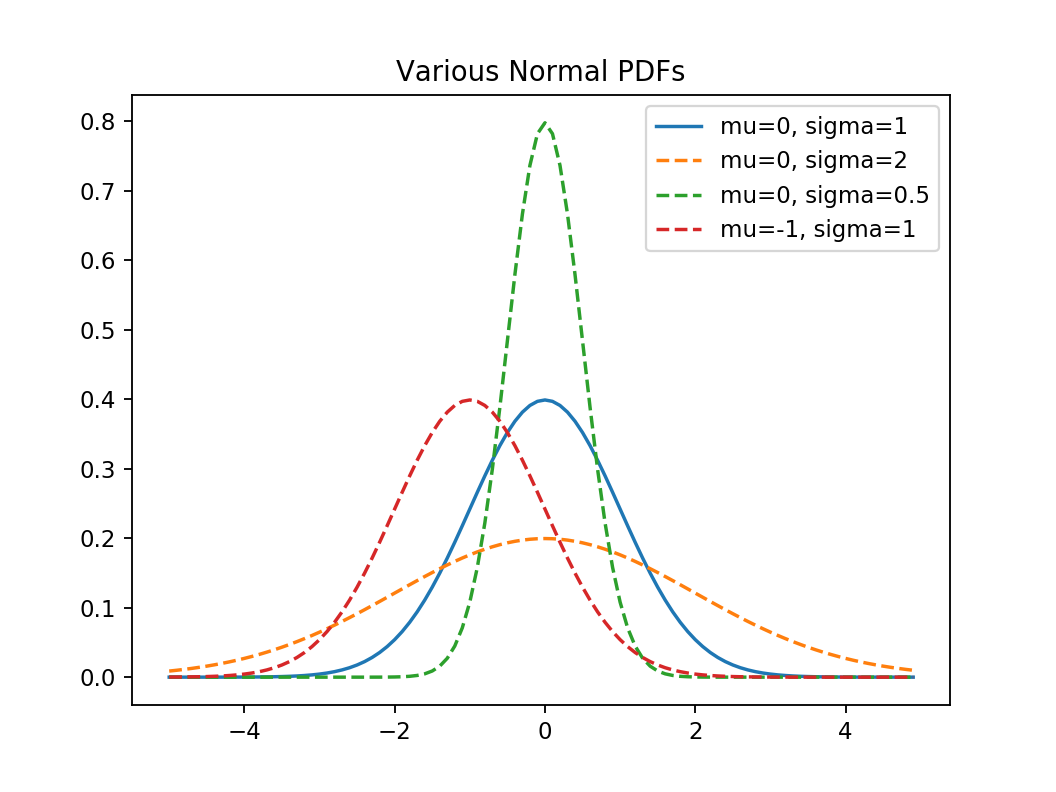

In [31]:
xs = [x/10.0 for x in range(-50,50)]

plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], '--', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs], '--', label='mu=-1, sigma=1')

plt.legend()
plt.title('Various Normal PDFs')
plt.show()

When μ = 0and σ = 1, it’s called the standard normal distribution. If Z is a standard
normal random variable, then it turns out that:

\begin{equation}
    X = \sigma Z + \mu
\end{equation}

is also normal but with mean μand standard deviation σ. Conversely, if X is a normal
random variable with mean μand standard deviation σ,

\begin{equation}
    Z = \frac{(X-\mu)}{\sigma}
\end{equation}

is a standard normal variable.

The cumulative distribution function for the normal distribution cannot be written in
an “elementary” manner, but we can write it using Python’s math.erf:

In [30]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

<IPython.core.display.Javascript object>


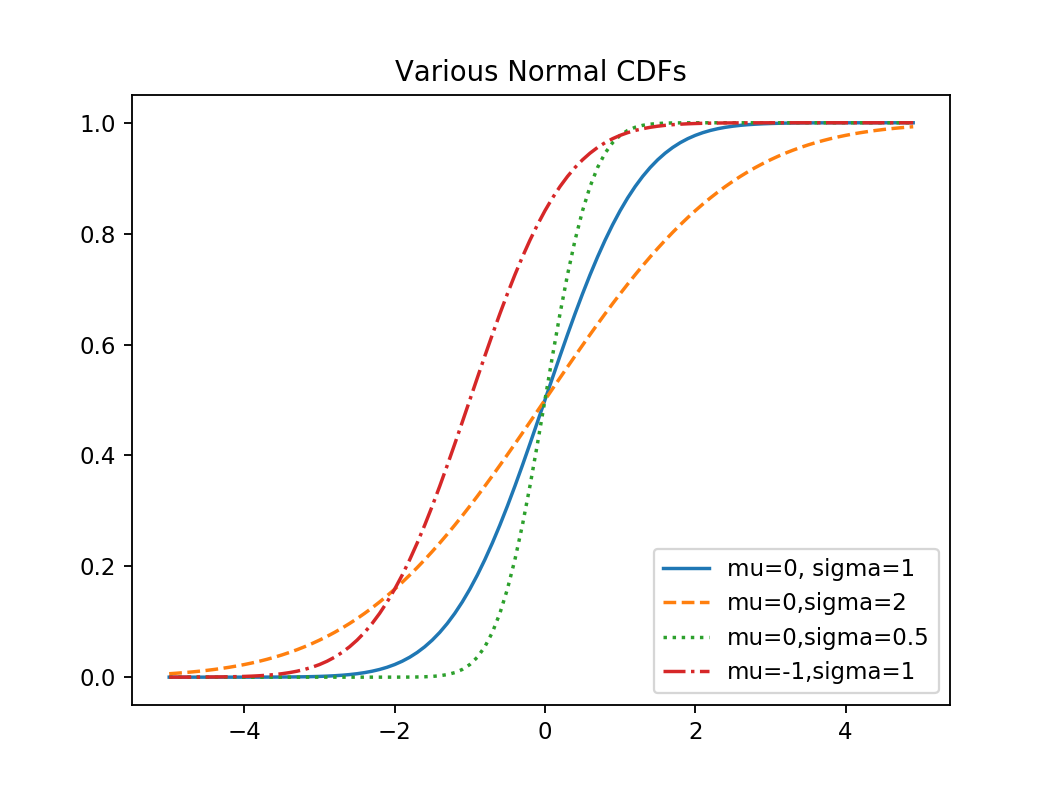

In [34]:
xs = [x/10.0 for x in range(-50,50)]

plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')

plt.legend(loc=4) # Bottom right.
plt.title('Various Normal CDFs')
plt.show()

Sometimes we’ll need to invert normal_cdf to find the value corresponding to a
specified probability. There’s no simple way to compute its inverse, but normal_cdf is
continuous and strictly increasing, so we can use a binary search:

In [62]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """Find approx. inverse using binary search."""
    
    # if not standard, compute standard and rescale
    if mu != 0 and sigma != 1:
        return mu+sigma*inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0  # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 0     # normal_cdf(10) is (very close to) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z)/2  # Consider the midpoint.
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

## The Central Limit Theorem

One reason the normal distribution is so useful is the central limit theorem, which
says (in essence) that a random variable defined as the average of a large number of
independent and identically distributed random variables is itself approximately nor‐
mally distributed.

In particular, if x1, ..., xn are random variables with mean μand standard deviation σ,
and if n is large, then:

\begin{equation}
    \frac{x_1 + x_2 + \ldots + x_n}{n}
\end{equation}

is approximately normally distributed with mean μand standard deviation σ/n.
Equivalently (but often more usefully),

\begin{equation}
    \frac{(x_1 + x_2 + \ldots + x_n) - n\mu}{\sigma \sqrt{n}}
\end{equation}

is approximately normally distributed with mean 0 and standard deviation 1.

An easy way to illustrate this is by looking at binomial random variables, which have
two parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p
and 0 with probability 1 − p:

In [35]:
import random

In [36]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

In [38]:
def binomial(n,p):
    """Binomial random variable is sum of n independent Bernoulli trial."""
    return sum(bernoulli_trial(p) for _ in range(n))

The mean of a Bernoulli(p) variable is p, and its standard deviation is p 1 − p . The
central limit theorem says that as n gets large, a Binomial(n,p) variable is approximately a normal random variable with mean μ = np and standard deviation
$\sigma = np \sqrt{1-p}$ . If we plot both, you can easily see the resemblance:

In [45]:
from collections import Counter
import math

In [56]:
def make_hist(p,n,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    # Use a bar chart to show the actual binomial samples.
    histogram = Counter(data)
#     plt.bar([x-0.4 for x in histogram.keys()], [v/num_points for v in histogram.values()], 0.8,
#             color='0.75')
    plt.bar([x for x in histogram.keys()], [v/num_points for v in histogram.values()], 0.8,
            color='0.75')
    
    mu = n*p
    sigma  = math.sqrt(n*p*(1-p))
    
    # Use a line chart to show the normal approximation
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i+0.5, mu, sigma) - normal_cdf(i-0.5, mu, sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title('Binomial Distribution vs Normal Approximation')
    plt.show()

<IPython.core.display.Javascript object>


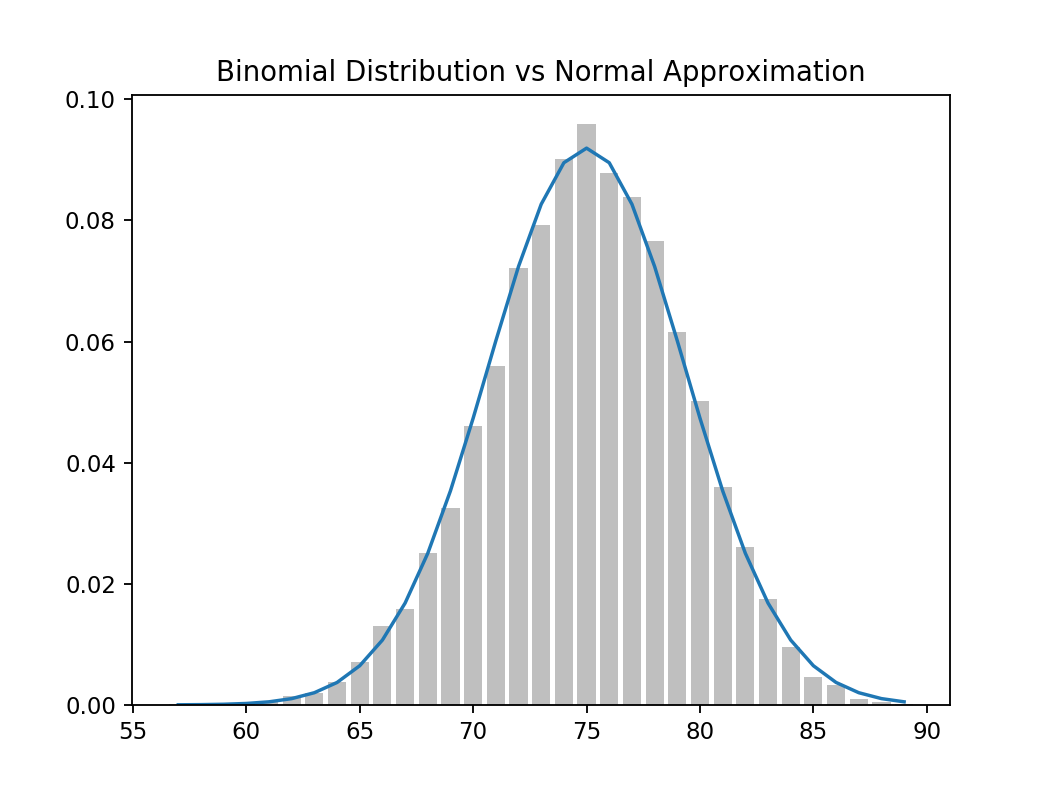

In [57]:
make_hist(0.75, 100, 10000)

The moral of this approximation is that if you want to know the probability that (say)
a fair coin turns up more than 60 heads in 100 flips, you can estimate it as the proba‐
bility that a Normal(50,5) is greater than 60, which is easier than computing the Bino‐
mial(100,0.5) cdf. (Although in most applications you’d probably be using statistical
software that would gladly compute whatever probabilities you want.)